# Atividade 2 - Meteorologia

Alunas: Ana Julia Pietroski e Bárbara Girardi

Análise das condições meteorológicas para realizar o estudo de dispersão de poluentes atmosféricos da Klabin S.A., utilizando o dado da estação meteorológica e de sondagem mais próximo, que neste caso é o aeroporto de Florianópolis.

## Etapa 1: Análise da condição meteorológica de superfície

Avaliação das condições meteorológicas no ano de 2023 e figuras da série temporal bruta e com médias, mínimas e máximas mensais com o pacote https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html para desenhar a sombra. Analisaremos os dados de metar (estação meteorológica em aeroportos). Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR para o período de 01/01/2023 a 01/01/2024.

Serão analisadas as seguintes condições meteorológicas: temperatura, umidade, pressão, cobertura de nuvens, velocidade e direção do vento.

Os dados estarão na pasta inputs/meteoSuperficie com a nomenclatura metar.csv

In [63]:
import os
rootPath = os.getcwd()
print(rootPath) #mostra a pasta/diretório que estou no momento

metSuperficiePath = rootPath + '\\inputs\\meteoSuperficie'
print(metSuperficiePath) 

#Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara
C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara\inputs\meteoSuperficie
['metar_2023.csv']


In [64]:
import pandas as pd

metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.658428  25.0    22.0  NaN  0.0  83.44  
1     1009.654835  25.0    22.0  NaN  0.0  83

In [65]:
#Criar uma coluna com Datetime dos dados

metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year','month','day','hour']])
print(metSuperficie['datetime'])

#Definindo a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,1,2023,0,NaN,360.0,5.144440,2133.6,3.0,3.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 00:00:00
2023-01-01 01:00:00,1,1,2023,1,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 01:00:00
2023-01-01 02:00:00,1,1,2023,2,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 02:00:00
2023-01-01 03:00:00,1,1,2023,3,NaN,350.0,4.629996,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 03:00:00
2023-01-01 04:00:00,1,1,2023,4,NaN,340.0,5.144440,1219.2,6.0,6.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


#### - Figura para representação da série temporal bruta e remoção dos dados discrepantes do tipo boxplot e com médias mensais

Inicialmente, foi feita a avaliação das condições meteorológicas de superfície  da estação meteorológica. Os dados foram apresentados no relatório disponibilizado no Github. Com base nos dados desta estação, foi elaborada uma figura para representação da série temporal bruta dos seguintes parâmetros: temperatura, pressão, umidade relativa, cobertura de nuvens, velocidade do vento e direção do vento.

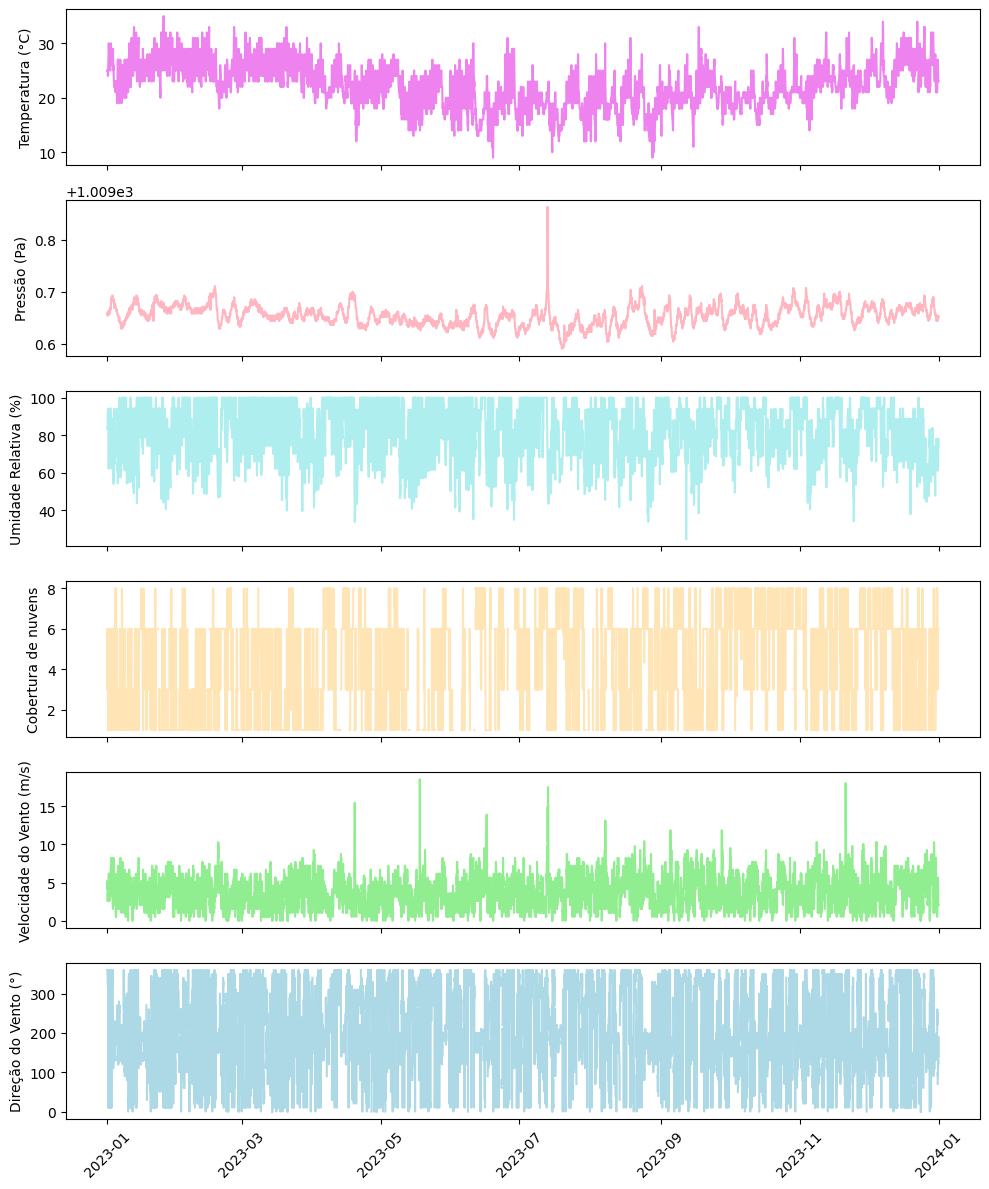

In [66]:
import matplotlib.pyplot as plt

# Supondo que metSuperficie já esteja definido e contém as colunas 'datetime', 'temp', 'p', 'relh', 'cco', 'ws', 'wd'
fig, ax = plt.subplots(6, sharex=True, figsize=(10, 12))

ax[0].plot(metSuperficie['datetime'], metSuperficie['temp'], color='violet')
ax[0].set_ylabel('Temperatura (°C)')

ax[1].plot(metSuperficie['datetime'], metSuperficie['p'], color='lightpink')
ax[1].set_ylabel('Pressão (Pa)')

ax[2].plot(metSuperficie['datetime'], metSuperficie['relh'], color='paleturquoise')
ax[2].set_ylabel('Umidade Relativa (%)')

ax[3].plot(metSuperficie['datetime'], metSuperficie['cco'], color='moccasin')
ax[3].set_ylabel('Cobertura de nuvens')

ax[4].plot(metSuperficie['datetime'], metSuperficie['ws'], color='lightgreen')
ax[4].set_ylabel('Velocidade do Vento (m/s)')

ax[5].plot(metSuperficie['datetime'], metSuperficie['wd'], color='lightblue')
ax[5].set_ylabel('Direção do Vento (°)')

ax[5].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

import os
rootFolder = os.getcwd()
figFolder = rootFolder.replace('\\','/')+'/figures/'
fig.savefig(figFolder+'Figure1.png') 

Com base nos dados brutos, em prol de obter uma melhor visualização e também permitir uma melhor análise, foram feitos gráficos no formato box plot, primeiramente dos dados brutos. Ao refinar os dados, foi utilizado um tratamento onde removeu–se os valores acima do percentil 99 e os dados expressados por NAN.
Dessa forma, obteve-se a seguinte figura:


O percentil 99 da temperatura é: 31.0
O percentil 99 da pressão é: 1009.6967607391396
O percentil 99 do umidade relativa é: 100.0
O percentil 99 da cco é: 8.0
O percentil 99 do ws é: 8.745548
O percentil 99 do wd é: 360.0


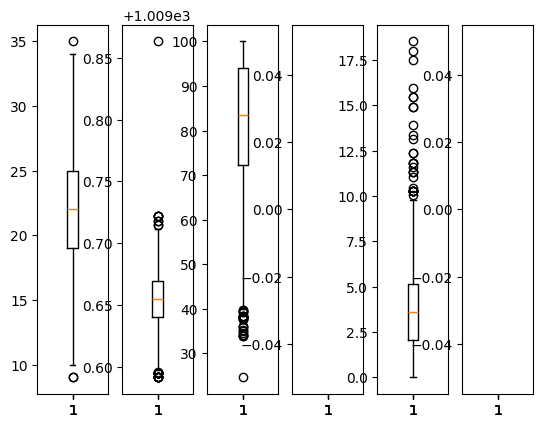

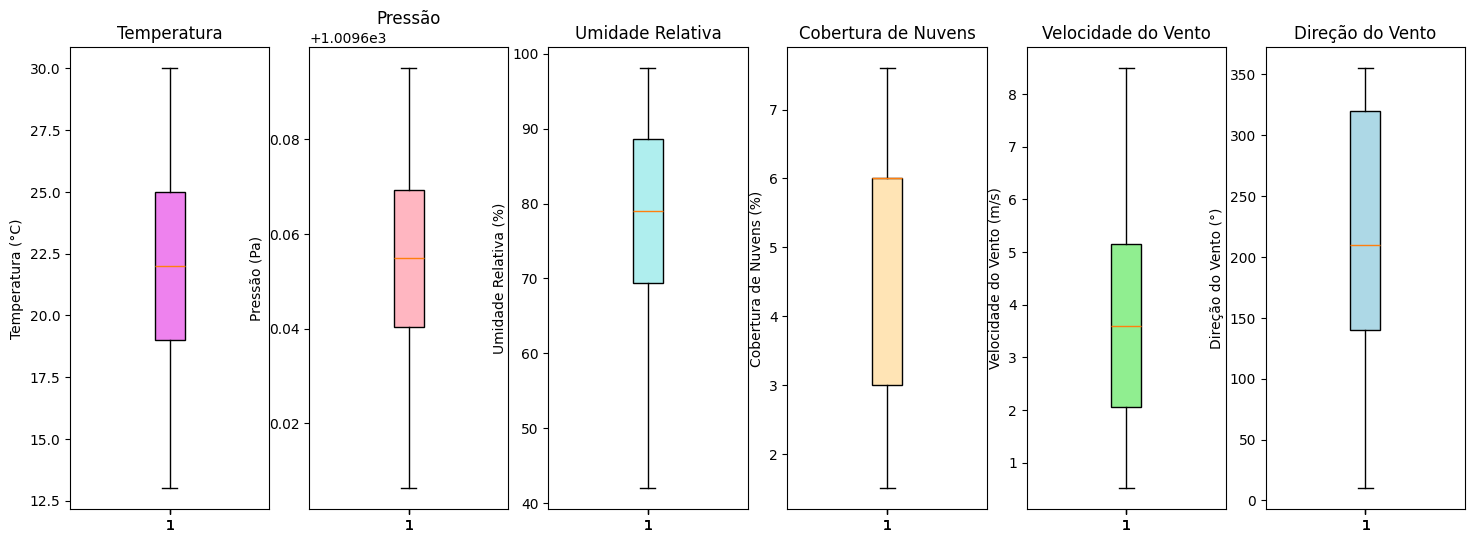

In [67]:
fig,ax = plt.subplots(1,6,sharex=True)
ax[0].boxplot(metSuperficie['temp'])
ax[1].boxplot(metSuperficie['p'])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'])
ax[4].boxplot(metSuperficie['ws'])
ax[5].boxplot(metSuperficie['wd'])

import numpy as np
temp99 = np.percentile(metSuperficie['temp'],99)
print('O percentil 99 da temperatura é: '+str(temp99))
p99 = np.percentile(metSuperficie['p'],99)
print('O percentil 99 da pressão é: '+str(p99))
relh99 = relh9 = np.percentile(metSuperficie['relh'],99)
print('O percentil 99 do umidade relativa é: '+str(relh99))
cco99 = np.nanpercentile(metSuperficie['cco'],99)
print('O percentil 99 da cco é: '+str(cco99))
ws99 = np.percentile(metSuperficie['ws'],99)
print('O percentil 99 do ws é: '+str(ws99))
wd99 =  np.nanpercentile(metSuperficie['wd'],99)
print('O percentil 99 do wd é: '+str(wd99))

# Definindo cores para cada boxplot
box_colors = ['violet', 'lightpink', 'paleturquoise', 'moccasin', 'lightgreen', 'lightblue']

fig, ax = plt.subplots(1, 6, sharex=True, figsize=(18, 6))

boxes = [
    ax[0].boxplot(metSuperficie['temp'][(metSuperficie['temp'] < temp99) & 
                                        (metSuperficie['temp'] > np.percentile(metSuperficie['temp'], 0.5))],
                  patch_artist=True, boxprops=dict(facecolor=box_colors[0])),
    ax[1].boxplot(metSuperficie['p'][(metSuperficie['p'] < p99) & 
                                     (metSuperficie['p'] > np.percentile(metSuperficie['p'], 0.5))],
                  patch_artist=True, boxprops=dict(facecolor=box_colors[1])),
    ax[2].boxplot(metSuperficie['relh'][(metSuperficie['relh'] < relh99) & 
                                        (metSuperficie['relh'] > np.percentile(metSuperficie['relh'], 0.5))],
                  patch_artist=True, boxprops=dict(facecolor=box_colors[2])),
    ax[3].boxplot(metSuperficie['cco'][(metSuperficie['cco'] < cco99) &
                                       (metSuperficie['cco'] > np.nanpercentile(metSuperficie['cco'], 0.5))],
                  patch_artist=True, boxprops=dict(facecolor=box_colors[3])),
    ax[4].boxplot(metSuperficie['ws'][(metSuperficie['ws'] < ws99) &
                                      (metSuperficie['ws'] > np.percentile(metSuperficie['ws'], 0.5))],
                  patch_artist=True, boxprops=dict(facecolor=box_colors[4])),
    ax[5].boxplot(metSuperficie['wd'][(metSuperficie['wd'] < wd99) &
                                      (metSuperficie['wd'] > np.nanpercentile(metSuperficie['wd'], 0.5))],
                  patch_artist=True, boxprops=dict(facecolor=box_colors[5]))
]

# Ajustando os rótulos dos eixos
ax[0].set_ylabel('Temperatura (°C)')
ax[1].set_ylabel('Pressão (Pa)')
ax[2].set_ylabel('Umidade Relativa (%)')
ax[3].set_ylabel('Cobertura de Nuvens (%)')
ax[4].set_ylabel('Velocidade do Vento (m/s)')
ax[5].set_ylabel('Direção do Vento (°)')

# Adicionando títulos para cada subplot
ax[0].set_title('Temperatura')
ax[1].set_title('Pressão')
ax[2].set_title('Umidade Relativa')
ax[3].set_title('Cobertura de Nuvens')
ax[4].set_title('Velocidade do Vento')
ax[5].set_title('Direção do Vento')

rootFolder = os.getcwd()
figFolder = rootFolder.replace('\\','/')+'/figures/'
fig.savefig(figFolder+'Figure2.png') 

Dessa forma, temos as condições meteorológicas do ano de 2023 em forma de figuras de série temporal bruta no boxplot acima e a série sem os dados discrepantes nos boxplots de baixo.

#### - Gráfico de médias, máximas e mínimas mensais para as condições meteorológicas de temperatura, pressão, umidade relativa, cobertura de nuvens, velocidade e direção do vento.

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh            datetime  
0     1009.658428  25.0    22.0  NaN  0.0  83.44 2023-01-01 00:00:00  
1    

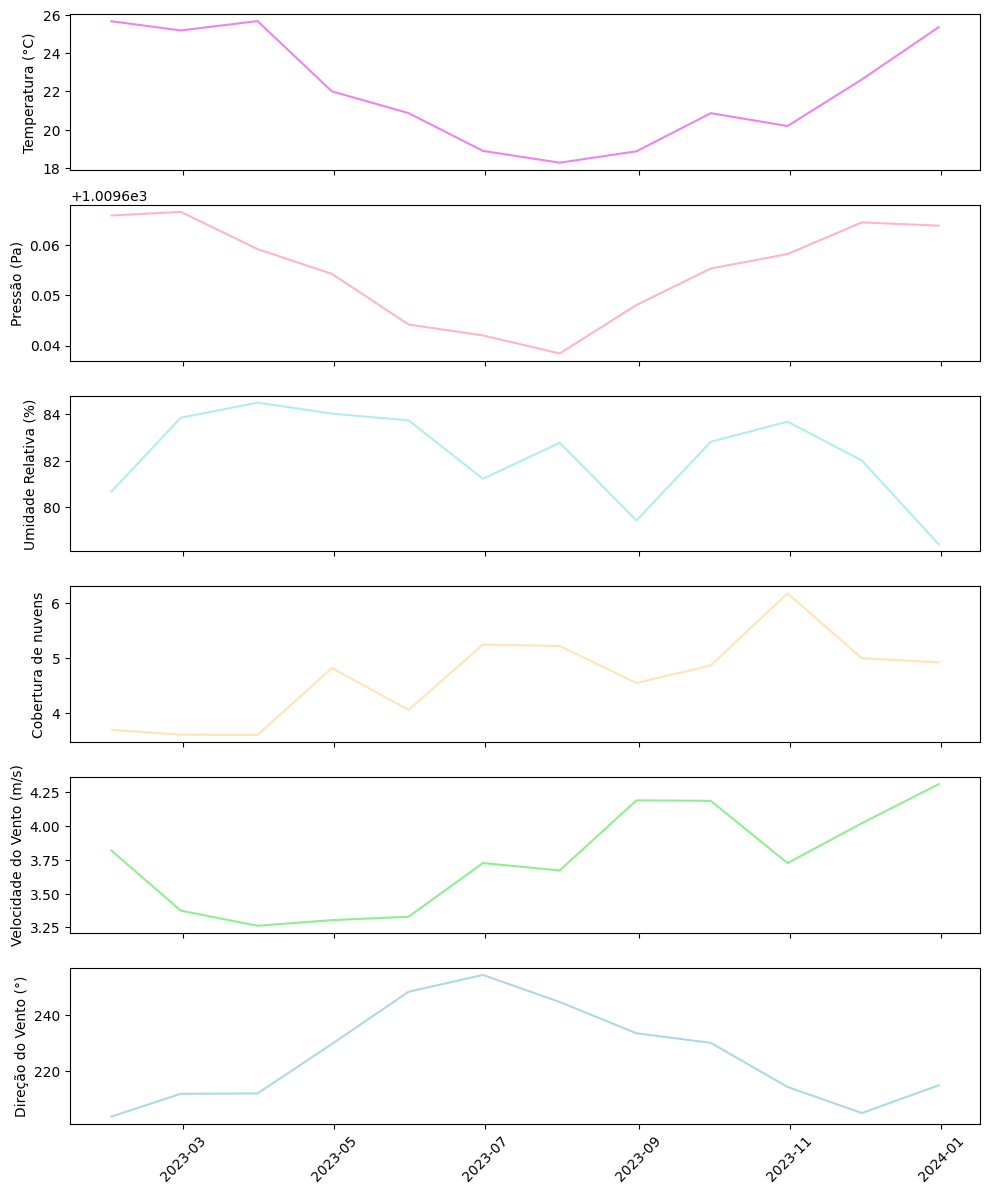

In [68]:

print(metSuperficie)
metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('ME').mean()
min_mensal = metSuperficie.resample('ME').min()
max_mensal = metSuperficie.resample('ME').max()

# Plotando figura após fazer a média mensal
fig, ax = plt.subplots(6, sharex=True, figsize=(10, 12))

ax[0].plot(media_mensal.index, media_mensal['temp'], color='violet')
ax[0].set_ylabel('Temperatura (°C)')

ax[1].plot(media_mensal.index, media_mensal['p'], color='lightpink')
ax[1].set_ylabel('Pressão (Pa)')

ax[2].plot(media_mensal.index, media_mensal['relh'], color='paleturquoise')
ax[2].set_ylabel('Umidade Relativa (%)')

ax[3].plot(media_mensal.index, media_mensal['cco'], color='moccasin')
ax[3].set_ylabel('Cobertura de nuvens')

ax[4].plot(media_mensal.index, media_mensal['ws'], color='lightgreen')
ax[4].set_ylabel('Velocidade do Vento (m/s)')

ax[5].plot(media_mensal.index, media_mensal['wd'], color='lightblue')
ax[5].set_ylabel('Direção do Vento (°)')

ax[5].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

rootFolder = os.getcwd()
figFolder = rootFolder.replace('\\','/')+'/figures/'
fig.savefig(figFolder+'Figure3.png') 

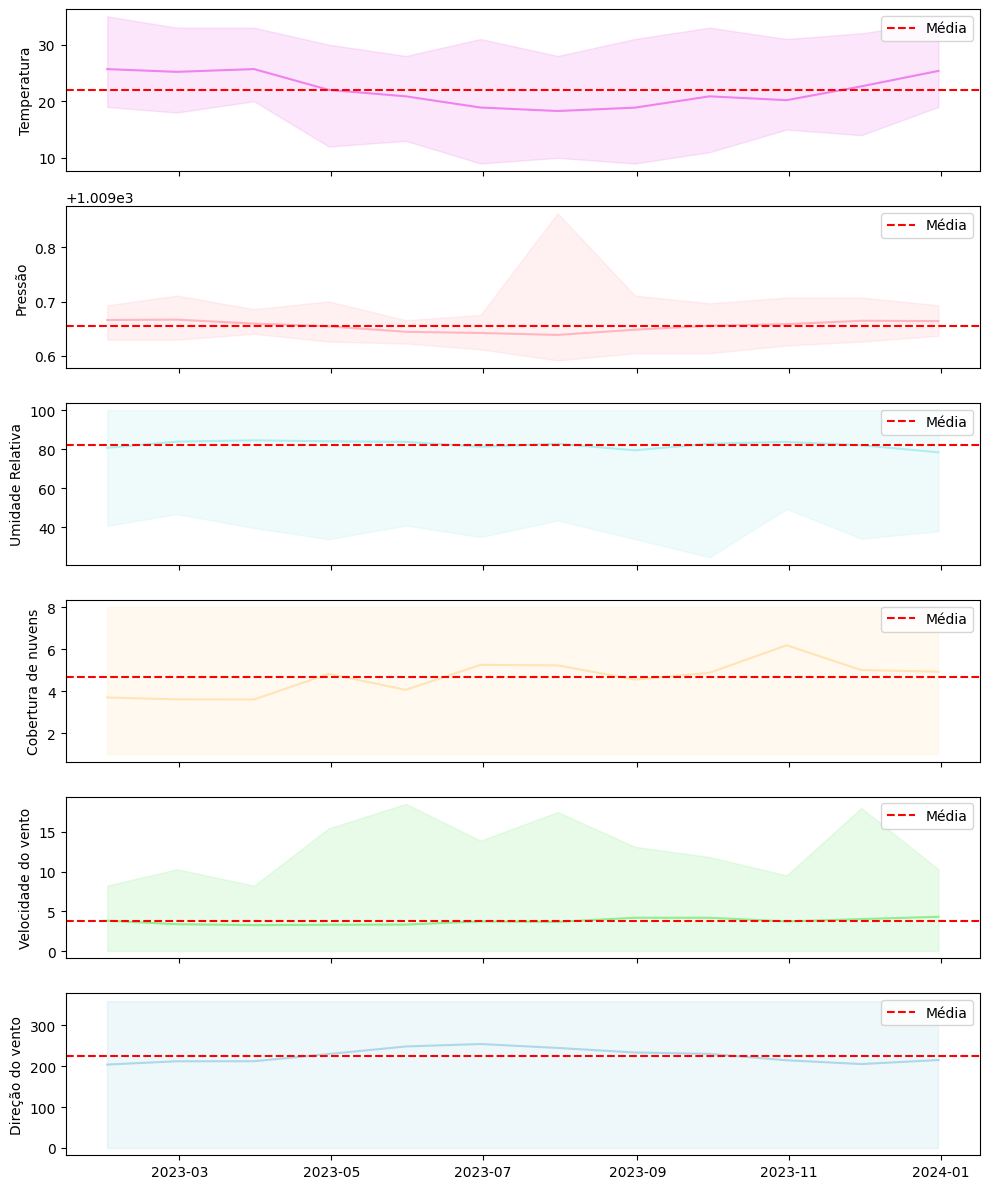

In [69]:
fig, ax = plt.subplots(6, sharex=True, figsize=(10, 12))

# Plot para a temperatura
ax[0].plot(media_mensal.index, media_mensal['temp'], color='violet')
ax[0].fill_between(media_mensal.index, min_mensal['temp'], max_mensal['temp'], color='violet', alpha=0.2)
ax[0].axhline(y=media_mensal['temp'].mean(), color='red', linestyle='--', label='Média')
ax[0].set_ylabel('Temperatura')
ax[0].legend()

# Plot para a pressão
ax[1].plot(media_mensal.index, media_mensal['p'], color='lightpink')
ax[1].fill_between(media_mensal.index, min_mensal['p'], max_mensal['p'], color='lightpink', alpha=0.2)
ax[1].axhline(y=media_mensal['p'].mean(), color='red', linestyle='--', label='Média')
ax[1].set_ylabel('Pressão')
ax[1].legend()

# Plot para a umidade relativa
ax[2].plot(media_mensal.index, media_mensal['relh'], color='paleturquoise')
ax[2].fill_between(media_mensal.index, min_mensal['relh'], max_mensal['relh'], color='paleturquoise', alpha=0.2)
ax[2].axhline(y=media_mensal['relh'].mean(), color='red', linestyle='--', label='Média')
ax[2].set_ylabel('Umidade Relativa')
ax[2].legend()

# Plot para a cobertura de nuvens
ax[3].plot(media_mensal.index, media_mensal['cco'], color='moccasin')
ax[3].fill_between(media_mensal.index, min_mensal['cco'], max_mensal['cco'], color='moccasin', alpha=0.2)
ax[3].axhline(y=media_mensal['cco'].mean(), color='red', linestyle='--', label='Média')
ax[3].tick_params(axis='x', rotation=45)
ax[3].set_ylabel('Cobertura de nuvens')
ax[3].legend()

# Plot para a velocidade do vento
ax[4].plot(media_mensal.index, media_mensal['ws'], color='lightgreen')
ax[4].fill_between(media_mensal.index, min_mensal['ws'], max_mensal['ws'], color='lightgreen', alpha=0.2)
ax[4].axhline(y=media_mensal['ws'].mean(), color='red', linestyle='--', label='Média')
ax[4].set_ylabel('Velocidade do vento')
ax[4].legend()

# Plot para a direção do vento
ax[5].plot(media_mensal.index, media_mensal['wd'], color='lightblue')
ax[5].fill_between(media_mensal.index, min_mensal['wd'], max_mensal['wd'], color='lightblue', alpha=0.2)
ax[5].axhline(y=media_mensal['wd'].mean(), color='red', linestyle='--', label='Média')
ax[5].set_ylabel('Direção do vento')
ax[5].legend()

plt.tight_layout()
plt.show()

rootFolder = os.getcwd()
figFolder = rootFolder.replace('\\','/')+'/figures/'
fig.savefig(figFolder+'Figure4.png') 

Acima é representado em gráfico as médias mensais (linha sólida colorida), a média anual (linha tracejada vermelha) e os dados máximos e mínimos mensais representados em sombra com o pacote https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html

- Temperatura: conforme exposto também no box-plot, temos que a temperatura média da cidade encontra-se na faixa de 21 - 22 °C, valor esperado para a cidade de Florianópolis. Ademais, a linha da média mensal segue o esperado para a época do ano, onde nos meses de verão está mais alta e nos meses de inverno, mais baixa; situação apresentada também nas faixas de máxima e mínimas mensais.
- Pressão: os dados da pressão estão numa faixa curta, mostrando pouca variabilidade entre os meses do ano de 2023. Nota-se, porém, que entre os meses de julho a setembro houve um aumento da pressão (pressão máxima).
- A umidade relativa da cidade obteve uma média mensal e anual com comportamento bastante constante, porém suas máximas e mínimas variaram bastante entre 40 e 100%. Tal fator se dá pela localização geográfica próxima ao mar, mantendo o ambiente mais úmido.
- Cobertura de nuvens: a nebulosidade é maior nos meses de outubro a dezembro, enquanto nos meses de janeiro a junho é menor. Tal fator depende de fenômenos meteorológicos (massas de ar), radiação solar, altitude, etc. Por se tratar de uma região litorânea, ocorre maior nebulosidade.


#### - Análise do vento com a Rosa dos Ventos

- Velocidade e Direção do vento: para melhor análise destes parâmetros, foi elaborada a rosa dos ventos com o pacote Windrose, WindroseAxez. A figura é apresentada a seguir:


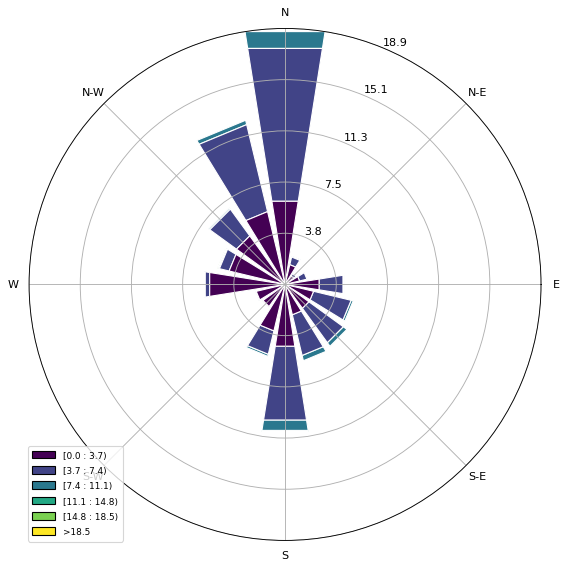

In [70]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed = True, opening = 0.8, edgecolor='white')
ax.set_legend()


Dessa forma, temos que o vento predominante é o Norte, seguido do Sul na região. Dessa forma, deve-se levar em consideração as fontes de poluição: é relevante analisar as fontes de poluição que ficam ao norte e ao sul do ponto de interesse, para entender o que chega a partir do vento. Isso impacta no transporte e dispersão dos poluentes. 

## Etapa 2: Análise do perfil de temperatura

Nesta etapa será feita a análise do perfil de temperatura da estação de monitoramento no aeroporto de Florianópolis utilizando o pacote Siphon do Python, com dados de 0 e 12 horas durante 10 dias, sendo 5 no verão e 5 no inverno. 

Além disso, serão determinados os pontos de inversão e possível altura da camada limite.

Analisando dados para 2023-12-20 00:00:00


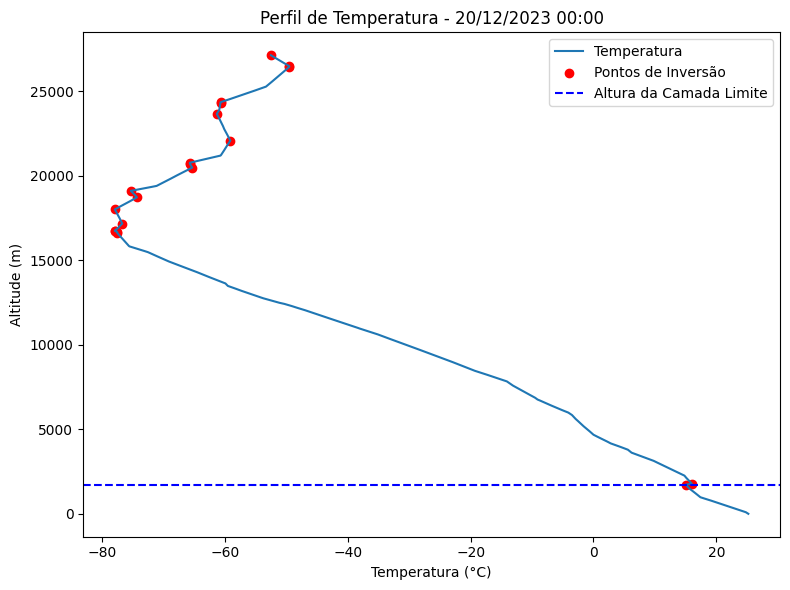

Analisando dados para 2023-12-20 12:00:00


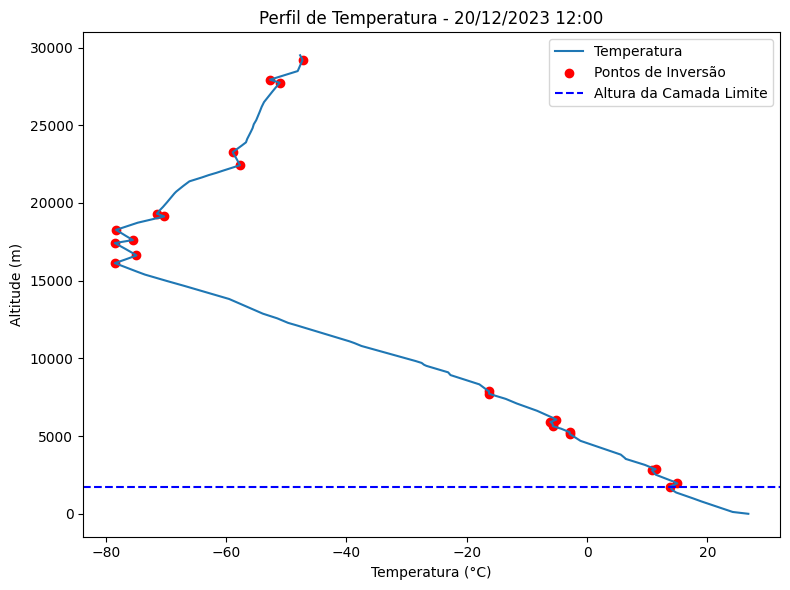

Analisando dados para 2023-12-16 00:00:00


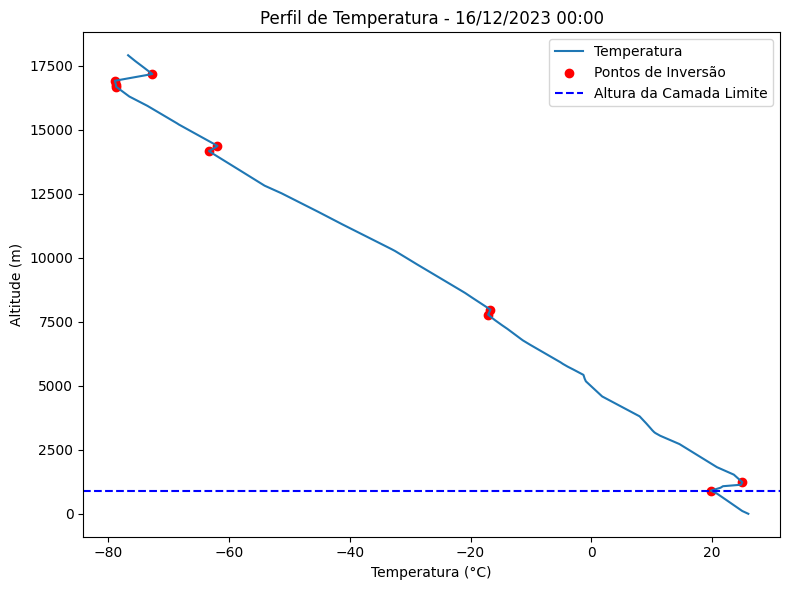

Analisando dados para 2023-12-16 12:00:00


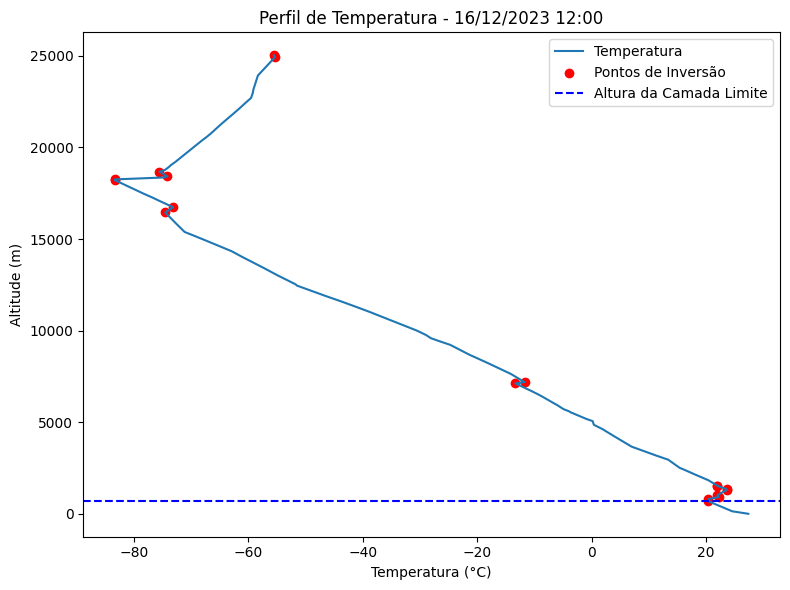

Analisando dados para 2024-01-24 00:00:00


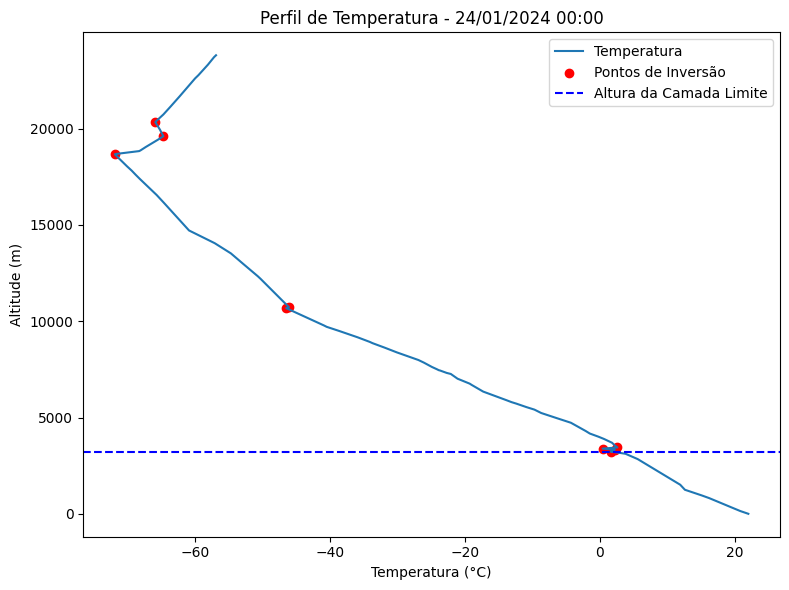

Analisando dados para 2024-01-24 12:00:00


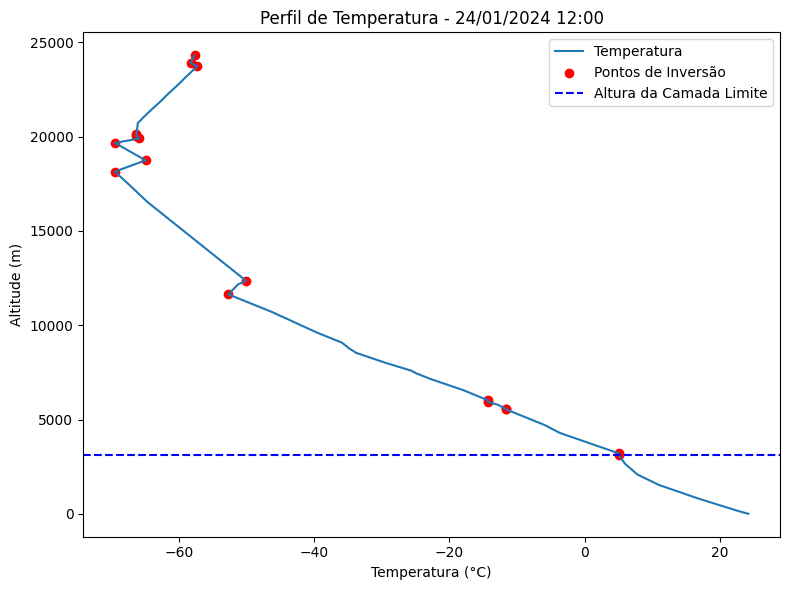

Analisando dados para 2023-12-05 00:00:00


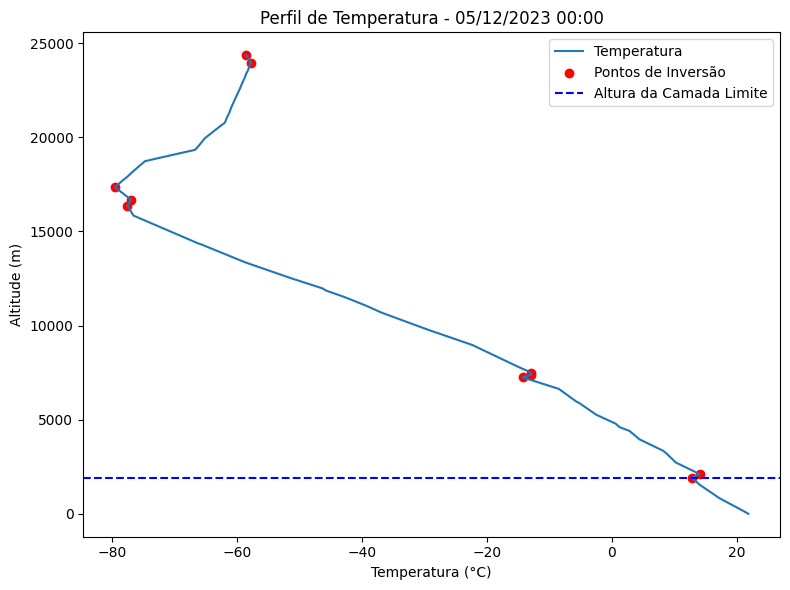

Analisando dados para 2023-12-05 12:00:00


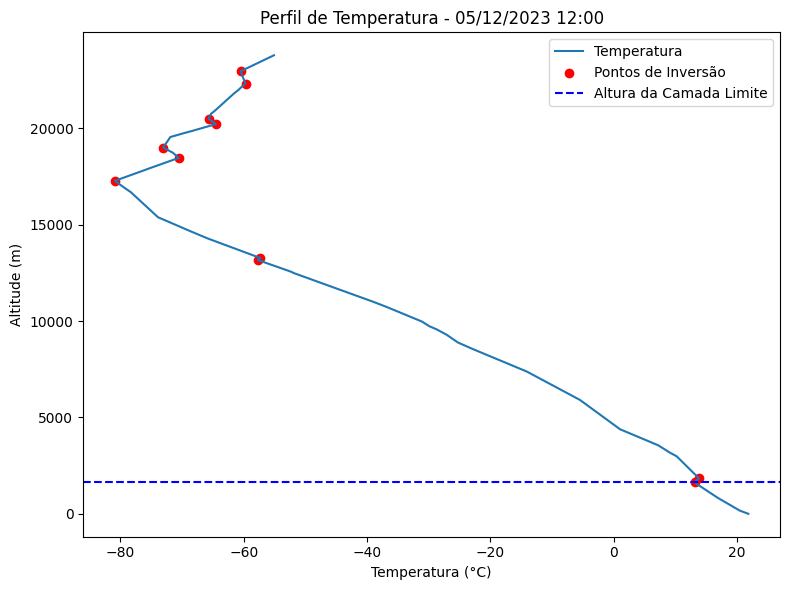

Analisando dados para 2023-12-31 00:00:00


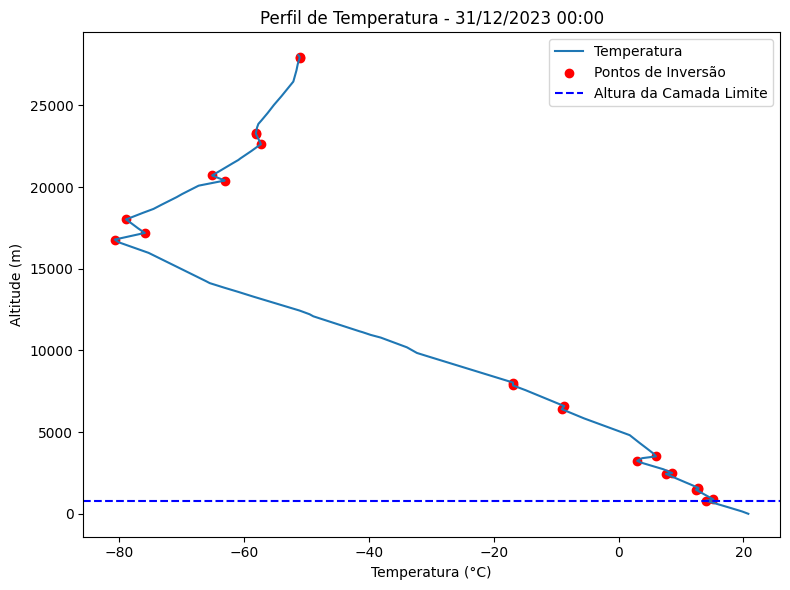

Analisando dados para 2023-12-31 12:00:00


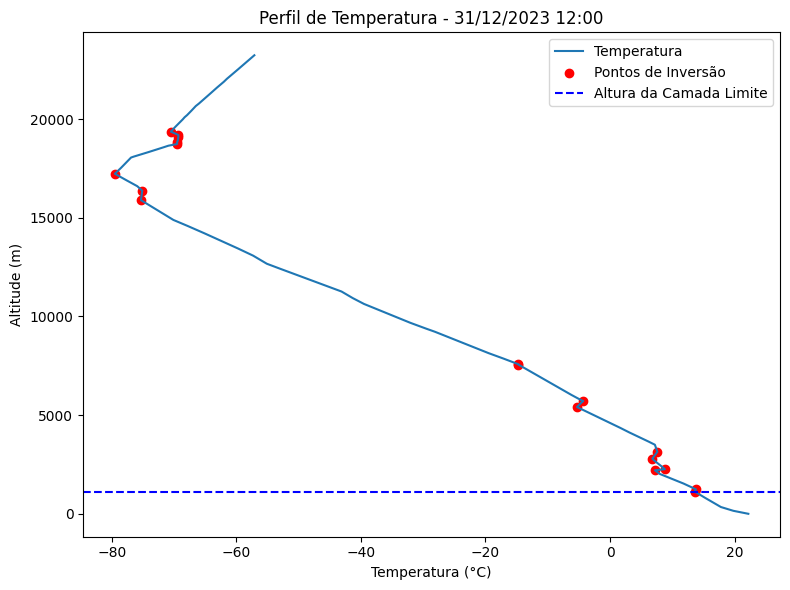

In [130]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir
import random

# Função para obter dados e plotar o perfil de temperatura com pontos de inversão e altura da camada limite
def plot_temperature_profile(date, station):
    try:
        # Extraindo os dados
        df = WyomingUpperAir.request_data(date, station)
        
        # Verificando se as colunas necessárias estão presentes e se os dados não estão vazios
        if df.empty or 'temperature' not in df.columns or 'height' not in df.columns:
            print(f"Dados de temperatura ou altura não encontrados para a data {date}")
            return
        
        # Encontrando pontos de inversão
        temp = df['temperature'].values
        alt = df['height'].values
        
        if len(temp) < 3 or len(alt) < 3:  # Verificar se há dados suficientes para calcular inversões
            print(f"Dados insuficientes para a data {date}")
            return
        
        pontos_inversao = np.where(np.diff(np.sign(np.diff(temp))) != 0)[0] + 1
        
        # Calculando a altura da camada limite
        altura_camada_limite = alt[pontos_inversao[0]] if len(pontos_inversao) > 0 else None
        
        # Fazendo figura do perfil de temperatura com pontos de inversão e altura da camada limite
        fig, ax = plt.subplots(figsize=(8, 6))
        
        # Perfil de temperatura com pontos de inversão e altura da camada limite
        ax.plot(temp, alt, label='Temperatura')
        ax.scatter(temp[pontos_inversao], alt[pontos_inversao], color='red', label='Pontos de Inversão')
        if altura_camada_limite:
            ax.axhline(y=altura_camada_limite, color='blue', linestyle='--', label='Altura da Camada Limite')
        ax.set_xlabel('Temperatura (°C)')
        ax.set_ylabel('Altitude (m)')
        ax.set_title(f'Perfil de Temperatura - {date.strftime("%d/%m/%Y %H:%M")}')
        ax.legend()

        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"Erro ao obter ou processar dados para a data {date}: {e}")

# Data inicial para análise no verão do hemisfério sul (dezembro, janeiro, fevereiro)
start_date = datetime(2023, 12, 1)
end_date = datetime(2024, 2, 28)
total_days = (end_date - start_date).days

# Local da análise
station = 'SBFL'

# Selecionar 5 dias aleatórios dentro do intervalo especificado
random_days = random.sample(range(total_days), 5)

# Função para gerar gráficos para os dias selecionados aleatórios
def generate_plots_for_random_days(random_days, station):
    for day_offset in random_days:
        for hour in [0, 12]:  # Considerando os horários de 00:00 e 12:00 horas
            date = start_date + timedelta(days=day_offset, hours=hour)
            print(f"Analisando dados para {date}")
            plot_temperature_profile(date, station)

# Gerar gráficos para os dias selecionados aleatórios
generate_plots_for_random_days(random_days, station)

Acima são apresentados os perfis de temperatura, os pontos de inversão e possível altura da camada limite para os meses de verão (dezembro, janeiro e fevereiro) do hemisfério sul.

#### - Análise do Perfil de Temperatura para os meses de INVERNO

Analisando dados para 2023-06-26 00:00:00


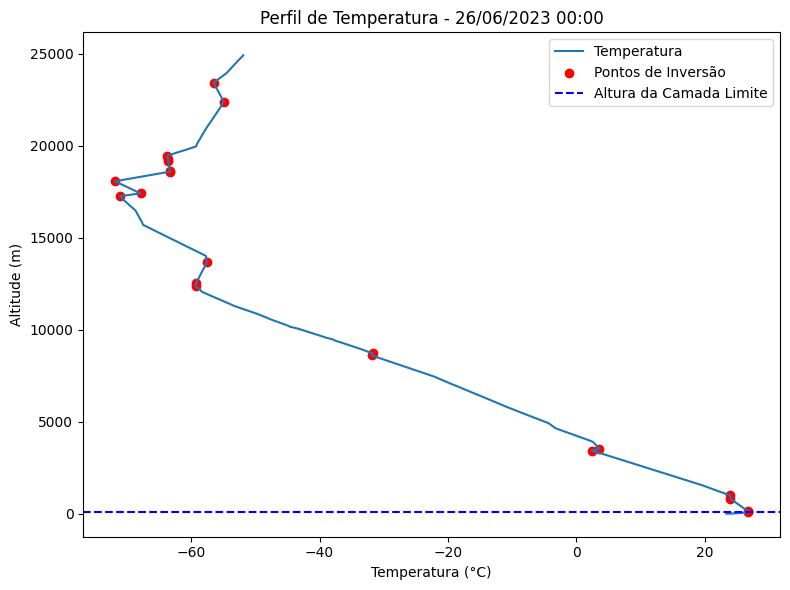

Analisando dados para 2023-06-26 12:00:00


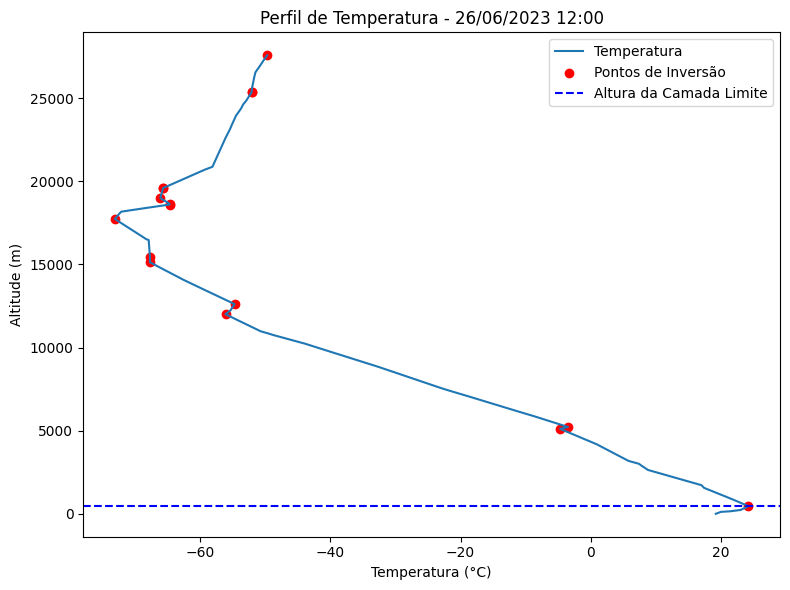

Analisando dados para 2023-06-04 00:00:00


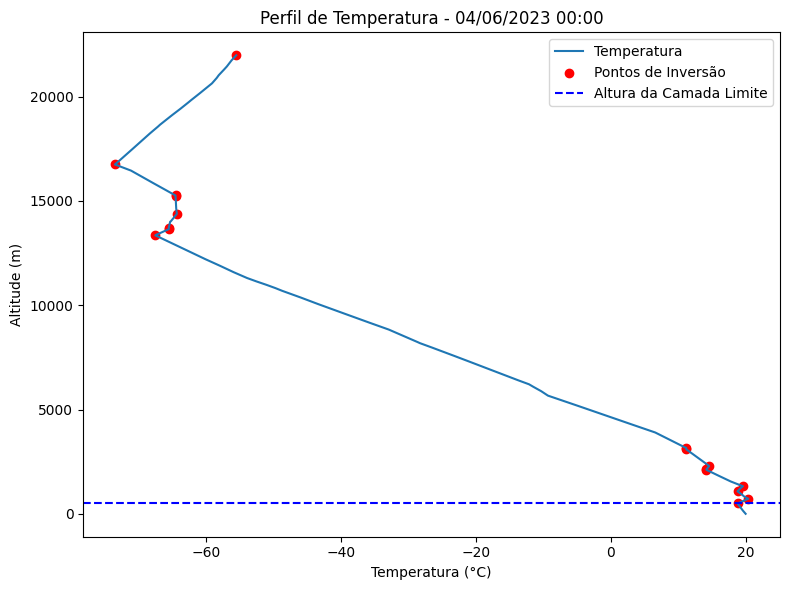

Analisando dados para 2023-06-04 12:00:00


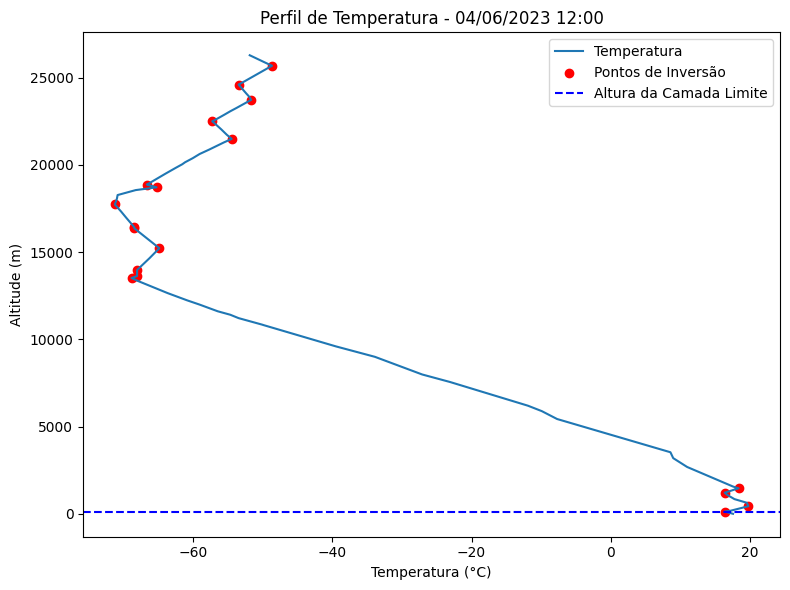

Analisando dados para 2023-07-08 00:00:00


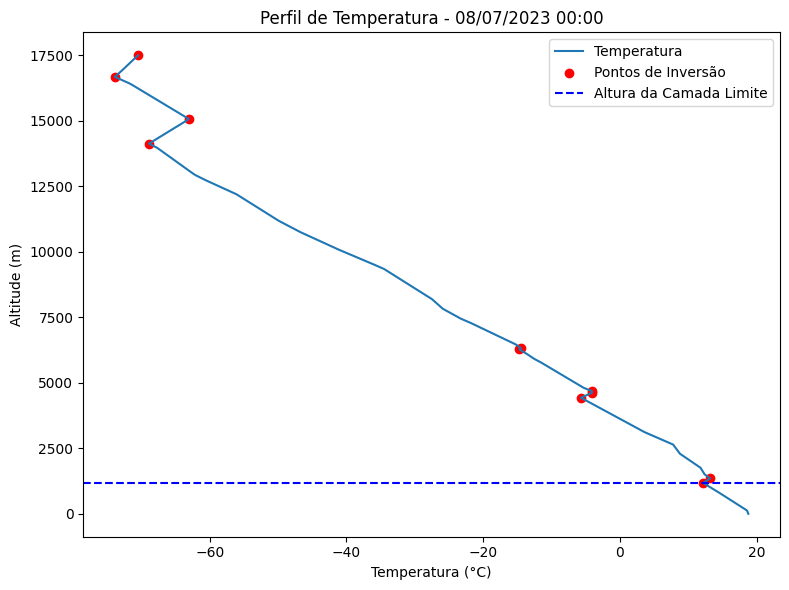

Analisando dados para 2023-07-08 12:00:00


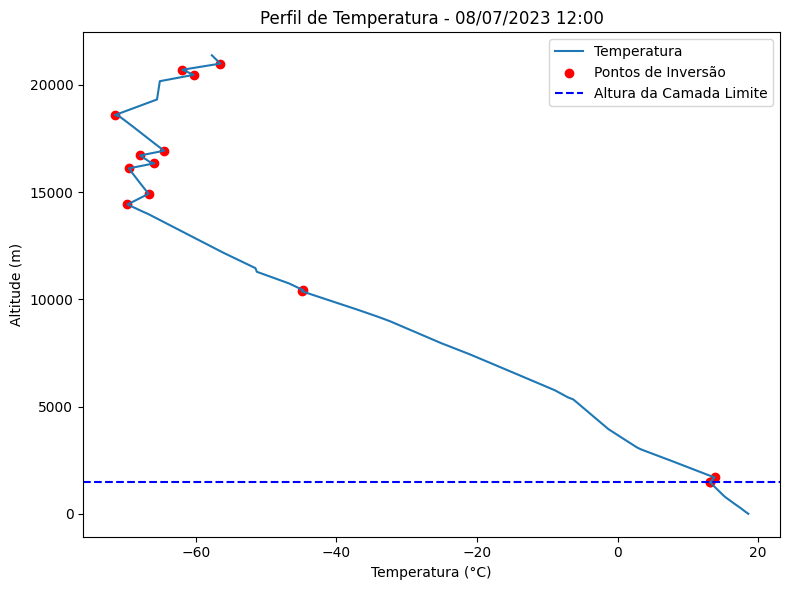

Analisando dados para 2023-07-10 00:00:00


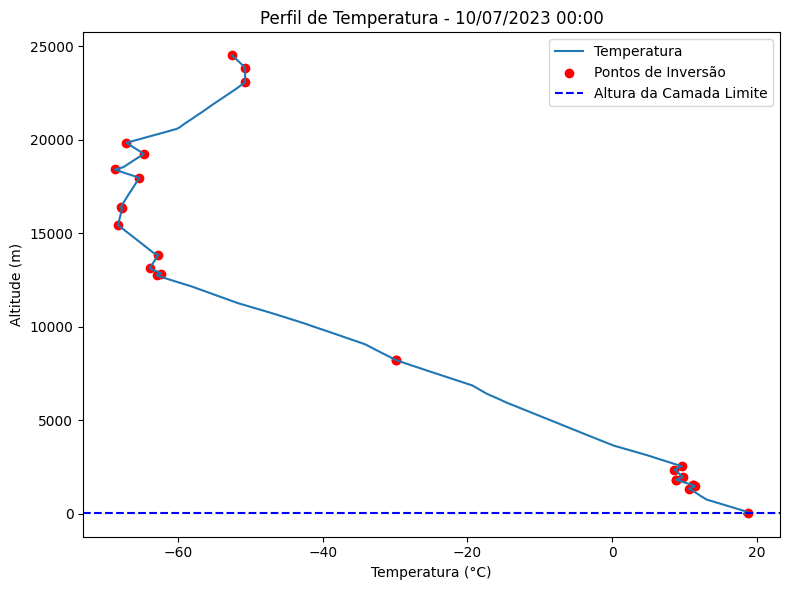

Analisando dados para 2023-07-10 12:00:00


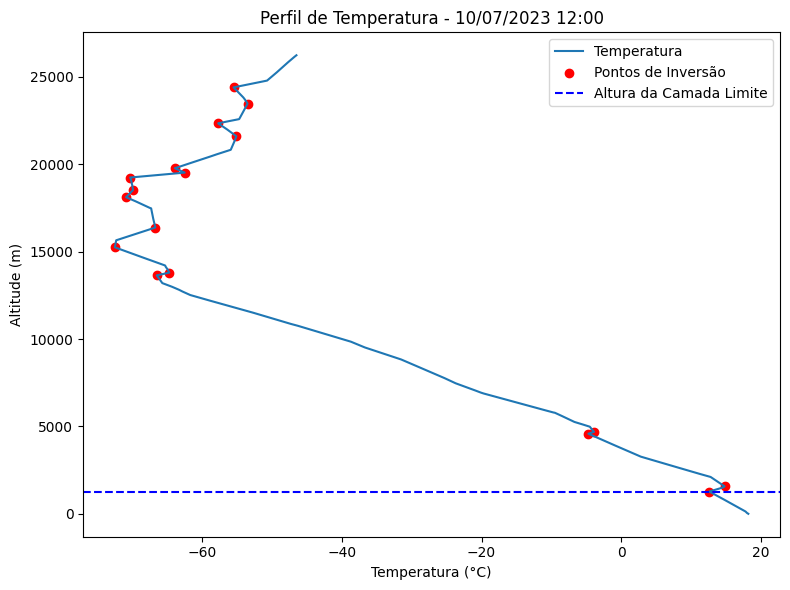

Analisando dados para 2023-06-03 00:00:00


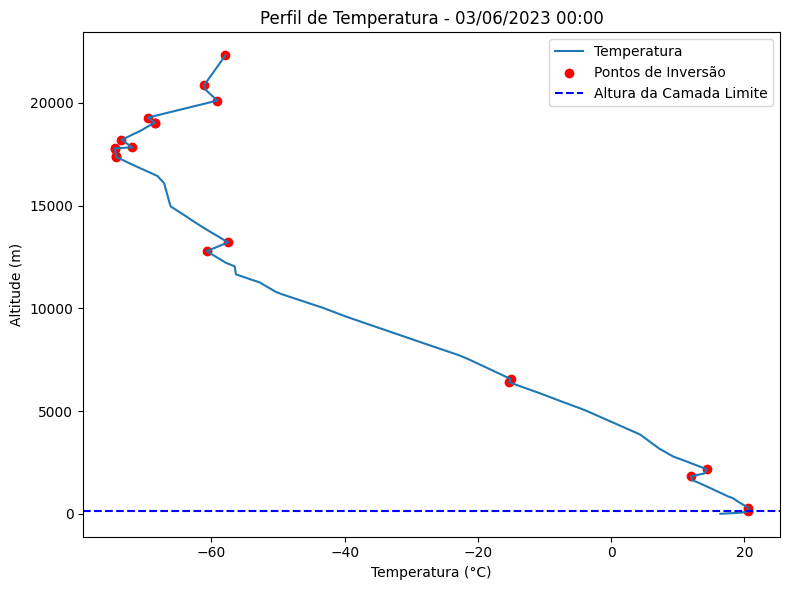

Analisando dados para 2023-06-03 12:00:00


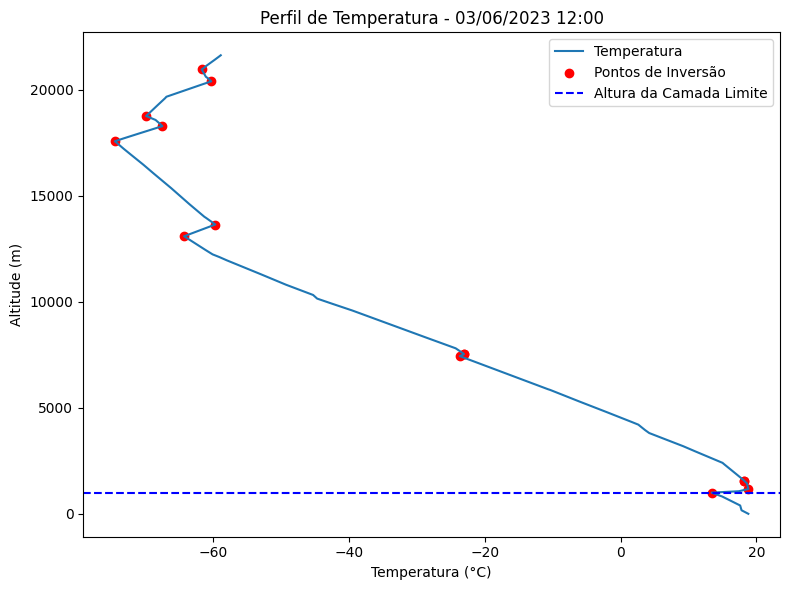

In [133]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir
import random

# Função para obter dados e plotar o perfil de temperatura com pontos de inversão e altura da camada limite
def plot_temperature_profile(date, station):
    try:
        # Extraindo os dados
        df = WyomingUpperAir.request_data(date, station)
        
        # Verificando se as colunas necessárias estão presentes e se os dados não estão vazios
        if df.empty or 'temperature' not in df.columns or 'height' not in df.columns:
            print(f"Dados de temperatura ou altura não encontrados para a data {date}")
            return
        
        # Encontrando pontos de inversão
        temp = df['temperature'].values
        alt = df['height'].values
        
        if len(temp) < 3 or len(alt) < 3:  # Verificar se há dados suficientes para calcular inversões
            print(f"Dados insuficientes para a data {date}")
            return
        
        pontos_inversao = np.where(np.diff(np.sign(np.diff(temp))) != 0)[0] + 1
        
        # Calculando a altura da camada limite
        altura_camada_limite = alt[pontos_inversao[0]] if len(pontos_inversao) > 0 else None
        
        # Fazendo figura do perfil de temperatura com pontos de inversão e altura da camada limite
        fig, ax = plt.subplots(figsize=(8, 6))
        
        # Perfil de temperatura com pontos de inversão e altura da camada limite
        ax.plot(temp, alt, label='Temperatura')
        ax.scatter(temp[pontos_inversao], alt[pontos_inversao], color='red', label='Pontos de Inversão')
        if altura_camada_limite:
            ax.axhline(y=altura_camada_limite, color='blue', linestyle='--', label='Altura da Camada Limite')
        ax.set_xlabel('Temperatura (°C)')
        ax.set_ylabel('Altitude (m)')
        ax.set_title(f'Perfil de Temperatura - {date.strftime("%d/%m/%Y %H:%M")}')
        ax.legend()

        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"Erro ao obter ou processar dados para a data {date}: {e}")

# Data inicial para análise no inverno do hemisfério sul (junho, julho, agosto)
start_date = datetime(2023, 6, 1)
end_date = datetime(2023, 8, 31)
total_days = (end_date - start_date).days

# Local da análise
station = 'SBFL'  # Estação de observação para o inverno

# Selecionar 5 dias aleatórios dentro do intervalo especificado
random_days = random.sample(range(total_days), 5)

# Função para gerar gráficos para os dias selecionados aleatórios
def generate_plots_for_random_days(random_days, station):
    for day_offset in random_days:
        for hour in [0, 12]:  # Considerando os horários de 00:00 e 12:00 horas
            date = start_date + timedelta(days=day_offset, hours=hour)
            print(f"Analisando dados para {date}")
            plot_temperature_profile(date, station)

# Gerar gráficos para os dias selecionados aleatórios
generate_plots_for_random_days(random_days, station)

Assim, temos os dados de INVERNO para os meses de junho, julho e agosto.

## Etapa 3: Execução do EZ-AERMET para avaliar a altura da camada limite e turbulência para os dados

Nesta etapa serão utilizados os dados de superfície e sondagem para executar o software. Serão feitas figuras para analisar as condições meteorológicas e dua potencial influência na qualidade do ar.

Também será analisado a superfície do local de estudo utilizando o output da plataforma EZ-AERMET, verificação dos valores de albedo, razão de Bowen e rugosidade para cada quadrante do vento.

In [90]:
rootPath = os.getcwd()
print(rootPath) #mostra a pasta/diretório que estou no momento

meteoPath = rootPath + '\\inputs\\ezAermet'
print(meteoPath) 

#Listando os arquivos dentro do diretório
files = os.listdir(meteoPath)
print(files)

C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara
C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara\inputs\ezAermet
['METEO.csv']


In [96]:
ezAermet=[]
for file in files:
    ezAermet.append(pd.read_csv(ezAermetPath+'\\'+file))

ezAermet = pd.concat(ezAermet)

print(ezAermet)

      year  month  day  Julian day  hour  sensible  surface  convective  \
0     2023      1    1           1     1     -50.0    0.571        -9.0   
1     2023      1    1           1     2     -47.7    0.545        -9.0   
2     2023      1    1           1     3     -54.4    0.622        -9.0   
3     2023      1    1           1     4     -61.1    0.699        -9.0   
4     2023      1    1           1     5     -25.3    0.290        -9.0   
...    ...    ...  ...         ...   ...       ...      ...         ...   
8755  2023     12   31         365    20     -43.5    0.496        -9.0   
8756  2023     12   31         365    21     -13.9    0.160        -9.0   
8757  2023     12   31         365    22     -11.4    0.140        -9.0   
8758  2023     12   31         365    23    -999.0   -9.000        -9.0   
8759  2023     12   31         365    24    -999.0   -9.000        -9.0   

      potential  mixing height  mechanically  Monin-Obukhov  roughness  \
0          -9.0          

In [97]:
# Caminho para o arquivo CSV
caminho = r'C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara\inputs\ezAermet\METEO.csv'

# Abrir o arquivo CSV como um DataFrame do pandas, especificando o encoding
df = pd.read_csv(caminho)

# Configurações para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Exibir DataFrame
display(df)

,year,month,day,Julian day,hour,sensible,surface,convective,potential,mixing height,mechanically,Monin-Obukhov,roughness,Bowen ratio,albedo,wind speed,wind direction,anemometer height,temperature,measurement height,precipitation,precipitation amount,relative humidity,station pressure (mb),cloud cover,wind speed.1,cloud cover.1
0,2023,1,1,1,1,-50.0,0.571,-9.0,-9.0,-999,1036,336.1,0.9767,0.45,1.0,4.1,1,14,298.1,2,0,0,83,1010,6,NAD-SFC,NoSubs
1,2023,1,1,1,2,-47.7,0.545,-9.0,-9.0,-999,967,305.8,0.8680,0.45,1.0,4.1,358,14,298.1,2,0,0,83,1010,6,NAD-SFC,NoSubs
2,2023,1,1,1,3,-54.4,0.622,-9.0,-9.0,-999,1177,399.0,0.8680,0.45,1.0,4.6,354,14,298.1,2,0,0,83,1010,6,NAD-SFC,NoSubs
3,2023,1,1,1,4,-61.1,0.699,-9.0,-9.0,-999,1398,502.7,0.8680,0.45,1.0,5.1,343,14,298.1,2,0,0,83,1010,6,NAD-SFC,NoSubs
4,2023,1,1,1,5,-25.3,0.290,-9.0,-9.0,-999,605,86.4,0.8680,0.45,1.0,2.6,333,14,298.1,2,0,0,89,1010,6,NAD-SFC,NoSubs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023,12,31,365,20,-43.5,0.496,-9.0,-9.0,-999,893,252.5,1.0130,0.45,1.0,3.6,127,14,297.1,2,0,0,69,1010,6,NAD-SFC,NoSubs
8756,2023,12,31,365,21,-13.9,0.160,-9.0,-9.0,-999,357,26.5,1.0130,0.45,1.0,2.1,119,14,297.1,2,0,0,69,1010,6,NAD-SFC,NoSubs
8757,2023,12,31,365,22,-11.4,0.140,-9.0,-9.0,-999,140,21.6,0.6982,0.45,1.0,2.1,192,14,296.1,2,0,0,78,1010,6,NAD-SFC,NoSubs
8758,2023,12,31,365,23,-999.0,-9.000,-9.0,-9.0,-999,-999,-99999.0,0.8099,0.45,1.0,999.0,999,-9,296.1,2,9999,-9,999,915,6,NAD,Sub_CC-TT


Resumo da altura da camada limite em 2023:
count    2690.000000
mean      992.993680
std       447.075472
min         6.000000
25%       669.250000
50%      1044.500000
75%      1316.750000
max      2251.000000
Name: mixing height, dtype: float64

Resumo da turbulência em 2023:
count    2690.000000
mean        0.624771
std         0.286045
min         0.095000
25%         0.394000
50%         0.598500
75%         0.827000
max         2.109000
Name: surface, dtype: float64


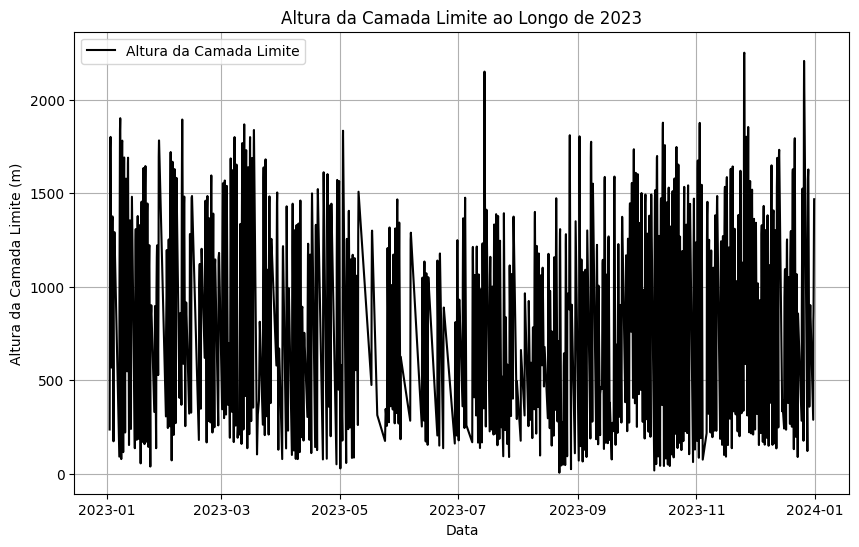

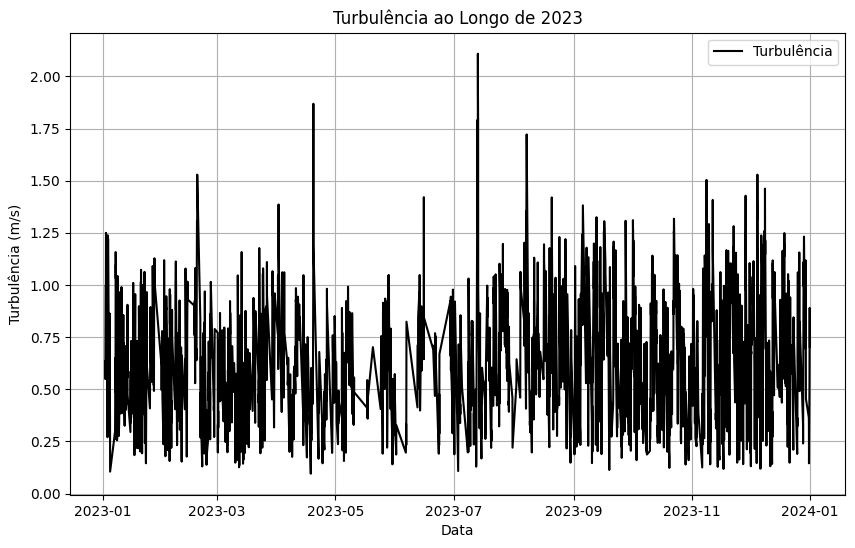

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Caminho para o arquivo CSV
meteo_file = r'C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara\inputs\ezAermet\METEO.csv'

# Carregando os dados
meteo = pd.read_csv(meteo_file)

# Convertendo data e hora para datetime
meteo['datetime'] = pd.to_datetime(meteo[['year', 'month', 'day', 'hour']])

# Filtrando dados de 2023
meteo_2023 = meteo[meteo['year'] == 2023]

# Removendo valores de -999 para a altura da camada limite convectiva e -9 para a escala de velocidade convectiva
meteo_2023 = meteo_2023[(meteo_2023['mixing height'] != -999) &
                        (meteo_2023['convective'] != -9)]

# Resumo estatístico das variáveis de interesse
blh_summary = meteo_2023['mixing height'].describe()
turbulence_summary = meteo_2023['surface'].describe()

print("Resumo da altura da camada limite em 2023:")
print(blh_summary)
print("\nResumo da turbulência em 2023:")
print(turbulence_summary)

# Figura para altura da camada limite ao longo do ano
plt.figure(figsize=(10, 6))
plt.plot(meteo_2023['datetime'], meteo_2023['mixing height'], label='Altura da Camada Limite', color='black')
plt.xlabel('Data')
plt.ylabel('Altura da Camada Limite (m)')
plt.title('Altura da Camada Limite ao Longo de 2023')
plt.legend()
plt.grid(True)
plt.show()

# Figura para turbulência ao longo do ano
plt.figure(figsize=(10, 6))
plt.plot(meteo_2023['datetime'], meteo_2023['surface'], label='Turbulência', color='black')
plt.xlabel('Data')
plt.ylabel('Turbulência (m/s)')
plt.title('Turbulência ao Longo de 2023')
plt.legend()
plt.grid(True)
plt.show()

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
file_path = 'C:\\Users\\Acer\\Desktop\\ENS5173_Barbara\\ENS5173_Barbara\\inputs\\ezAermet\\METEO.csv'
data = pd.read_csv(file_path)

# Filtrar os valores de direção do vento iguais a 999
data = data[data['wind direction'] != 999]

# Definir os limites dos quadrantes de vento em graus
quadrant_limits = [(0, 90), (90, 180), (180, 270), (270, 360)]

# Inicializar listas para armazenar os valores médios dos parâmetros para cada quadrante
albedo_means = []
bowen_ratio_means = []
roughness_means = []

# Iterar sobre os quadrantes de vento
for lower_limit, upper_limit in quadrant_limits:
    # Selecionar os dados dentro do intervalo de direção do vento atual
    quadrant_data = data[(data['wind direction'] >= lower_limit) & (data['wind direction'] < upper_limit)]
    
    # Calcular os valores médios dos parâmetros para este quadrante
    albedo_mean = quadrant_data['albedo'].mean()
    bowen_ratio_mean = quadrant_data['Bowen ratio'].mean()
    roughness_mean = quadrant_data['roughness'].mean()
    
    # Adicionar os valores médios às listas
    albedo_means.append(albedo_mean)
    bowen_ratio_means.append(bowen_ratio_mean)
    roughness_means.append(roughness_mean)

# Imprimir os valores médios para cada quadrante de vento
for i, (lower_limit, upper_limit) in enumerate(quadrant_limits):
    print(f"Quadrante {i+1} (Direção do vento de {lower_limit}° a {upper_limit}°):")
    print(f"Albedo médio: {albedo_means[i]}")
    print(f"Razão de Bowen média: {bowen_ratio_means[i]}")
    print(f"Rugosidade média: {roughness_means[i]}")
    print()

Quadrante 1 (Direção do vento de 0° a 90°):
Albedo médio: 0.6918307567127746
Razão de Bowen média: 0.6773718470301058
Rugosidade média: 0.9527536208299432

Quadrante 2 (Direção do vento de 90° a 180°):
Albedo médio: 0.6580898876404495
Razão de Bowen média: 0.6987835857352223
Rugosidade média: 0.9709684416218857

Quadrante 3 (Direção do vento de 180° a 270°):
Albedo médio: 0.6414122596153846
Razão de Bowen média: 0.6926923076923076
Rugosidade média: 0.6462850961538462

Quadrante 4 (Direção do vento de 270° a 360°):
Albedo médio: 0.562223201174743
Razão de Bowen média: 0.7138590308370043
Rugosidade média: 0.7606146842878121



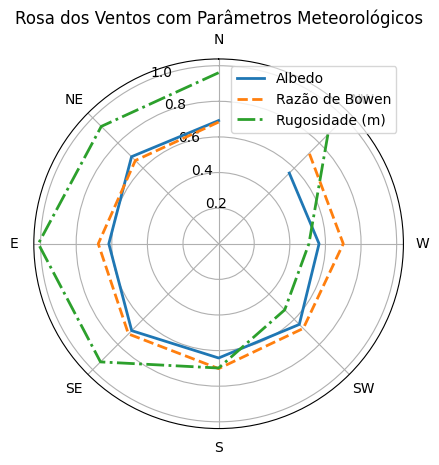

Octante N:
Média de Albedo: 0.69
Média de Razão de Bowen: 0.68
Média de Rugosidade (m): 0.96

Octante NE:
Média de Albedo: 0.69
Média de Razão de Bowen: 0.66
Média de Rugosidade (m): 0.93

Octante E:
Média de Albedo: 0.62
Média de Razão de Bowen: 0.68
Média de Rugosidade (m): 1.01

Octante SE:
Média de Albedo: 0.69
Média de Razão de Bowen: 0.72
Média de Rugosidade (m): 0.94

Octante S:
Média de Albedo: 0.64
Média de Razão de Bowen: 0.70
Média de Rugosidade (m): 0.70

Octante SW:
Média de Albedo: 0.64
Média de Razão de Bowen: 0.67
Média de Rugosidade (m): 0.53

Octante W:
Média de Albedo: 0.56
Média de Razão de Bowen: 0.70
Média de Rugosidade (m): 0.51

Octante NW:
Média de Albedo: 0.56
Média de Razão de Bowen: 0.72
Média de Rugosidade (m): 0.87



In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados do arquivo CSV
file_path = 'C:\\Users\\Acer\\Desktop\\ENS5173_Barbara\\ENS5173_Barbara\\inputs\\ezAermet\\METEO.csv'
data = pd.read_csv(file_path)

# Filtrar os valores de direção do vento iguais a 999
data = data[data['wind direction'] != 999]

# Definir os limites dos octantes de vento em graus
octant_limits = [(0, 45), (45, 90), (90, 135), (135, 180), (180, 225), (225, 270), (270, 315), (315, 360)]

# Inicializar listas para armazenar os valores médios dos parâmetros para cada octante
albedo_means = []
bowen_ratio_means = []
roughness_means = []

# Iterar sobre os octantes de vento
for lower_limit, upper_limit in octant_limits:
    # Selecionar os dados dentro do intervalo de direção do vento atual
    octant_data = data[(data['wind direction'] >= lower_limit) & (data['wind direction'] < upper_limit)]
    
    # Calcular os valores médios dos parâmetros para este octante
    albedo_mean = octant_data['albedo'].mean()
    bowen_ratio_mean = octant_data['Bowen ratio'].mean()
    roughness_mean = octant_data['roughness'].mean()
    
    # Adicionar os valores médios às listas
    albedo_means.append(albedo_mean)
    bowen_ratio_means.append(bowen_ratio_mean)
    roughness_means.append(roughness_mean)

# Definir os rótulos dos octantes
octant_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

# Definir os ângulos para cada octante da rosa dos ventos (com o Norte para cima)
angles = np.radians([0, 45, 90, 135, 180, 225, 270, 315])

# Criar o gráfico da rosa dos ventos
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Plotar os dados de albedo
ax.plot(angles, albedo_means, label='Albedo', linestyle='-', linewidth=2)

# Plotar os dados de razão de Bowen
ax.plot(angles, bowen_ratio_means, label='Razão de Bowen', linestyle='--', linewidth=2)

# Plotar os dados de rugosidade
ax.plot(angles, roughness_means, label='Rugosidade (m)', linestyle='-.', linewidth=2)

# Adicionar grade radial e definir as legendas
ax.grid(True)
ax.legend()

# Definir os rótulos dos ângulos
ax.set_xticks(angles)
ax.set_xticklabels(octant_labels)

# Inverter a direção do ângulo para que o Norte fique para cima
ax.set_theta_zero_location('N')

# Adicionar título ao gráfico
ax.set_title('Rosa dos Ventos com Parâmetros Meteorológicos')

# Mostrar o gráfico
plt.show()

# Iterar sobre os octantes de vento e imprimir as médias dos parâmetros
for label, albedo_mean, bowen_ratio_mean, roughness_mean in zip(octant_labels, albedo_means, bowen_ratio_means, roughness_means):
    print(f'Octante {label}:')
    print(f'Média de Albedo: {albedo_mean:.2f}')
    print(f'Média de Razão de Bowen: {bowen_ratio_mean:.2f}')
    print(f'Média de Rugosidade (m): {roughness_mean:.2f}')
    print()


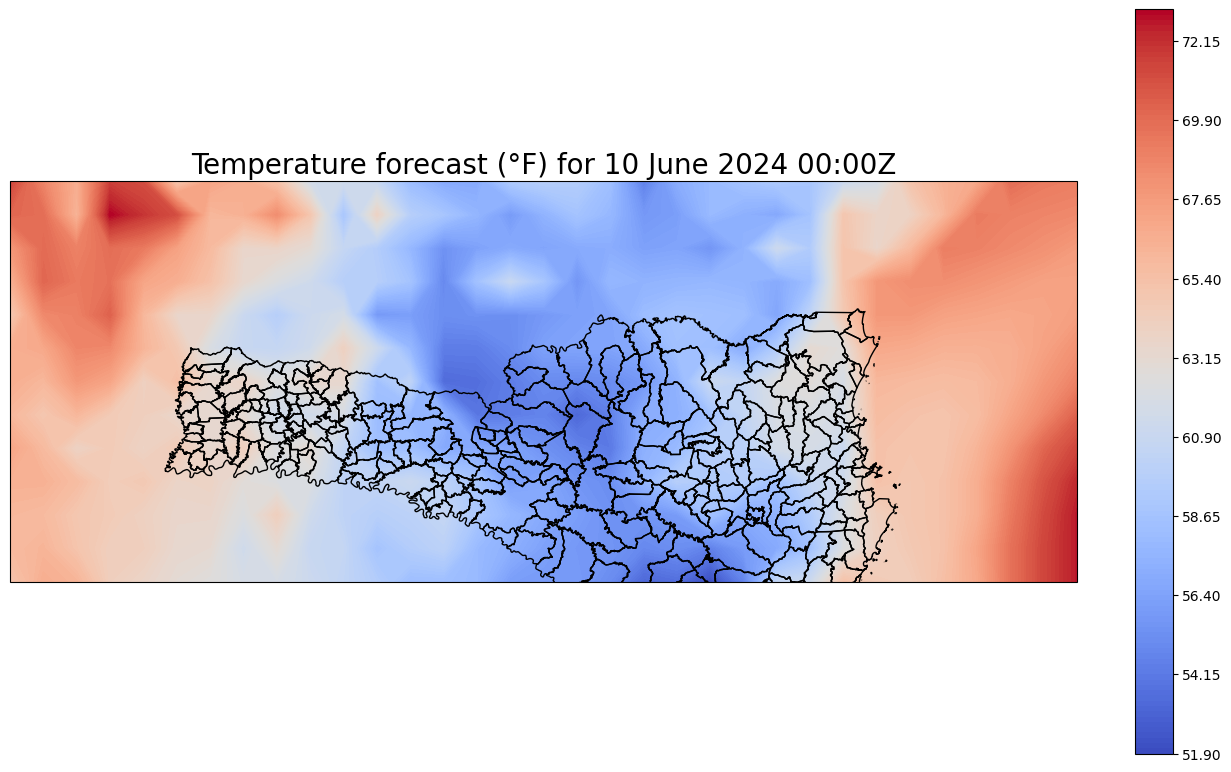

In [135]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np
import geopandas as gpd

from siphon.catalog import TDSCatalog

# Coordenadas da área de interesse
lon_min = -55
lon_max = -47
lat_min = -28
lat_max = -25

# Configurar os dados e a consulta
best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()
query.lonlat_box(north=lat_max, south=lat_min, east=lon_max, west=lon_min).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

# Obter os dados
data = ncss.get_data(query)

# Pegar as variáveis
temp_var = data.variables['Temperature_surface']
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Pegar os valores das variáveis
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()
time_val = num2date(time_var[:].squeeze(), time_var.units)
temp_vals = temp_vals * 1.8 - 459.67
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Plotar
fig = plt.figure(figsize=(15, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

# Adicionar contorno de temperatura
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0, cmap='coolwarm')

# Adicionar limites do município
municipios = gpd.read_file(r'C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara\inputs\ezAermet')
municipios.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)

# Adicionar colorbar
plt.colorbar(cf, ax=ax, fraction=0.032)

# Adicionar título
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val), fontsize=20)

# Mostrar a plotagem
plt.show()

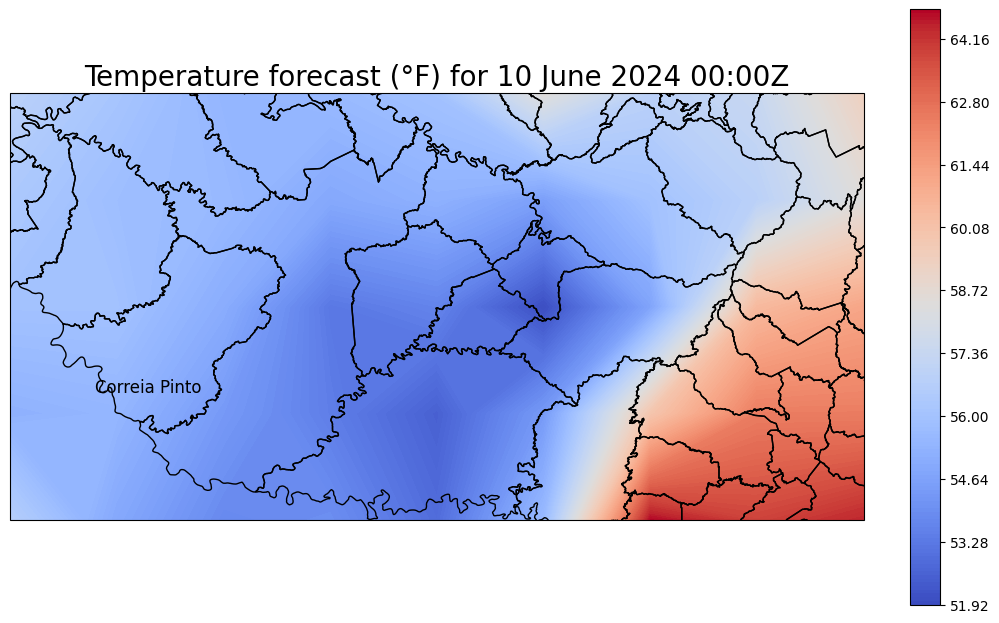

In [137]:
from datetime import datetime

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np
import geopandas as gpd

from siphon.catalog import TDSCatalog

# Coordenadas da área de interesse (ajustadas para Correia Pinto)
lon_min = -51
lon_max = -49
lat_min = -28.5
lat_max = -27.5

# Configurar os dados e a consulta
best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()
query.lonlat_box(north=lat_max, south=lat_min, east=lon_max, west=lon_min).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

# Obter os dados
data = ncss.get_data(query)

# Pegar as variáveis
temp_var = data.variables['Temperature_surface']
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Pegar os valores das variáveis
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()
time_val = num2date(time_var[:].squeeze(), time_var.units)
temp_vals = temp_vals * 1.8 - 459.67
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Plotar
fig = plt.figure(figsize=(12, 9))  # Redimensionar a figura
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

# Adicionar limites do município
municipios = gpd.read_file(r'C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara\inputs\ezAermet')
municipios.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)

# Adicionar contorno de temperatura
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0, cmap='coolwarm')

# Adicionar colorbar
plt.colorbar(cf, ax=ax, fraction=0.032)

# Adicionar título
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val), fontsize=20)

# Adicionar o nome da cidade de Correia Pinto
ax.annotate('Correia Pinto', xy=(-50.8, -28.2), xytext=(-50.8, -28.2),
            fontsize=12, color='black')

# Mostrar a plotagem
plt.show()